In [ ]:
import pandas as pd 

In [ ]:
data = pd.read_csv('/content/googleplaystore.csv')

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
median_rating = data['Rating'].median()
mean_rating = data['Rating'].mean()
print("Mean :", median_rating, "|", "Median", mean_rating )
 

Mean : 4.3 | Median 4.193338315362443


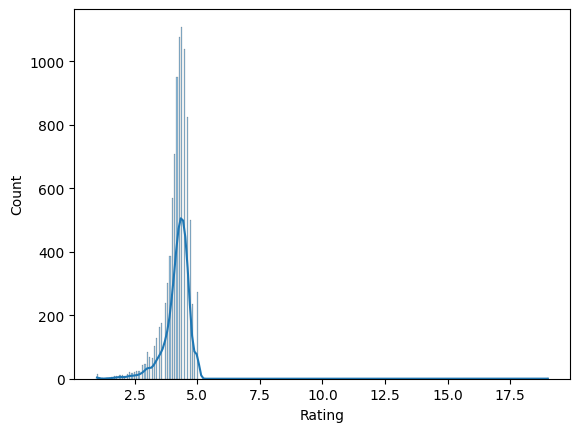

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=data, x='Rating', kde=True)
plt.show()

In [ ]:
data['Rating'].fillna(median_rating, inplace=True)

In [ ]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [ ]:
values_to_remove = ['1+', '5+', '0+']

# Filter and remove rows with specified values in the 'Installs' column
data = data[~data['Installs'].isin(values_to_remove)]

In [ ]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+'], dtype=object)

In [ ]:
data['Price'] = data['Price'].astype(str)

In [ ]:
data.loc[:, 'Price'] = data['Price'].str.replace('$', '').astype(float)

<ipython-input-15-2bd300fda937>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.loc[:, 'Price'] = data['Price'].str.replace('$', '').astype(float)
<ipython-input-15-2bd300fda937>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'Price'] = data['Price'].str.replace('$', '').astype(float)


In [ ]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
columns_to_encode = ['Category', 'Genres', 'Content Rating']

# Perform one-hot encoding on the specified columns
Updated_data = pd.get_dummies(data, columns=columns_to_encode, prefix='', prefix_sep='')

In [ ]:
Updated_data

,App,Rating,Reviews,Size,Installs,Type,Price,Last Updated,Current Ver,Android Ver,...,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather,Word,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free,0.0,"January 7, 2018",1.0.0,4.0.3 and up,...,0,0,0,0,0,1,0,0,0,0
1,Coloring book moana,3.9,967,14M,"500,000+",Free,0.0,"January 15, 2018",2.0.0,4.0.3 and up,...,0,0,0,0,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7M,"5,000,000+",Free,0.0,"August 1, 2018",1.2.4,4.0.3 and up,...,0,0,0,0,0,1,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",Free,0.0,"June 8, 2018",Varies with device,4.2 and up,...,0,0,0,0,0,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",Free,0.0,"June 20, 2018",1.1,4.4 and up,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,4.5,38,53M,"5,000+",Free,0.0,"July 25, 2017",1.48,4.1 and up,...,0,0,0,0,0,1,0,0,0,0
10837,Fr. Mike Schmitz Audio Teachings,5.0,4,3.6M,100+,Free,0.0,"July 6, 2018",1.0,4.1 and up,...,0,0,0,0,0,1,0,0,0,0
10838,Parkinson Exercices FR,4.3,3,9.5M,"1,000+",Free,0.0,"January 20, 2017",1.0,2.2 and up,...,0,0,0,0,0,1,0,0,0,0
10839,The SCP Foundation DB fr nn5n,4.5,114,Varies with device,"1,000+",Free,0.0,"January 19, 2015",Varies with device,Varies with device,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
columns_to_drop = ['Last Updated', 'Current Ver', 'Android Ver','App']
Updated_data = Updated_data.drop(columns=columns_to_drop)

In [ ]:
Updated_data['Size'] = Updated_data['Size'].replace('Varies with device', '0')

# Create 'Size_Category' column
Updated_data['Size_Category'] = Updated_data['Size'].apply(lambda x: 1 if x == '0' else 0)

In [ ]:
Updated_data['Size'] = Updated_data['Size'].apply(lambda x: float(x) if isinstance(x, float) else float(x.rstrip('k')) / 1024)


In [ ]:
Updated_data['Installs'] = Updated_data['Installs'].str.replace(",", "").str.replace("+", "").astype(int)

<ipython-input-26-cf9cdc9d78dc>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Updated_data['Installs'] = Updated_data['Installs'].str.replace(",", "").str.replace("+", "").astype(int)


In [ ]:
Updated_data['Type'] = Updated_data['Type'].str.replace("Free", "0").replace("Paid", "1").astype(int)


In [ ]:
Updated_data.head(20)

,Rating,Reviews,Size,Installs,Type,Price,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,...,Video Players & Editors;Music & Video,Weather,Word,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated,Size_Category
0,4.1,159,19.0,10000,0,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3.9,967,14.0,500000,0,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4.7,87510,8.7,5000000,0,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4.5,215644,25.0,50000000,0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4.3,967,2.8,100000,0,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,4.4,167,5.6,50000,0,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,3.8,178,19.0,50000,0,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,4.1,36815,29.0,1000000,0,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,4.4,13791,33.0,1000000,0,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,4.7,121,3.1,10000,0,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


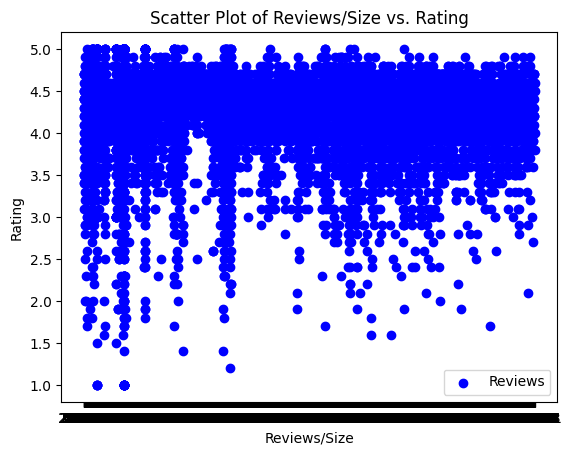

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(Updated_data['Reviews'], Updated_data['Rating'], color='blue', label='Reviews')

# Add labels and title
plt.xlabel('Reviews/Size')
plt.ylabel('Rating')
plt.title('Scatter Plot of Reviews/Size vs. Rating')

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split


X = Updated_data.drop(columns = 'Rating')
y = Updated_data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# Create and train the SVR model with RBF kernel
svr = SVR(kernel='rbf', verbose=1)

In [ ]:
svr.fit(X_train,y_train)

[LibSVM]

SVR(verbose=1)

In [ ]:
y_pred = svr.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.24954431261553886


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [ ]:
knn = KNeighborsRegressor(n_neighbors=15)

In [ ]:
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=15)

In [ ]:
y_pred = knn.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.22768612


In [ ]:
import numpy as np

[(10, -0.0051329839780913655),
 (20, 0.03775836578750613),
 (30, 0.04546105188956118),
 (40, 0.06582659441737793),
 (50, 0.050879035825126095),
 (60, 0.06918061214958571),
 (70, 0.062402902980961406),
 (80, 0.06366001458037918),
 (90, 0.05716472353259783),
 (100, 0.07145960812110064),
 (110, 0.0674689445596286),
 (120, 0.06573013295730967),
 (130, 0.0746483415561281),
 (140, 0.06968224442644633),
 (150, 0.06587804628951921),
 (160, 0.07073662644026846),
 (170, 0.0713031734011158),
 (180, 0.07693250277693353),
 (190, 0.06402842157228794)]

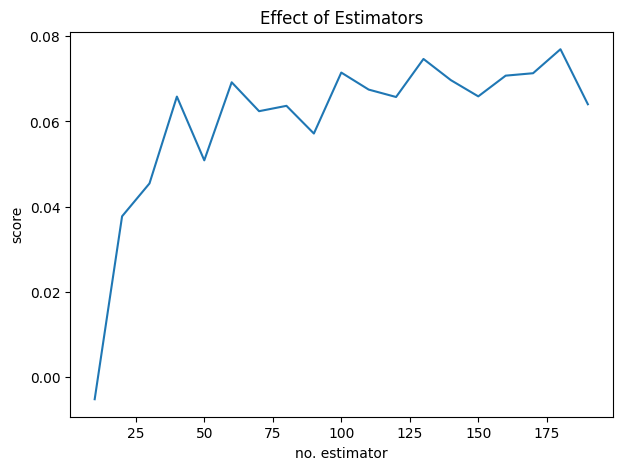

In [ ]:
model = RandomForestRegressor(n_jobs=-1)
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
results = list(zip(estimators,scores))
results

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.23477663166508156


In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
model = RandomForestRegressor(n_estimators=100, max_features=8)

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(max_features=8)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.22568626511777395
